# 1. Thêm các thư viện cần thiết

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pprint

# 2. Đọc dữ liệu ALNY, REGN, VRTX

In [33]:
df1 = pd.read_csv('../Datasets/ALNY.csv')
df2 = pd.read_csv('../Datasets/REGN.csv')
df3 = pd.read_csv('../Datasets/VRTX.csv')

In [34]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,85.709999,85.989998,84.900002,85.370003,85.370003,537900
1,2019-03-04,86.050003,86.400002,82.660004,85.000000,85.000000,717800
2,2019-03-05,88.160004,90.330002,87.349998,88.309998,88.309998,849900
3,2019-03-06,85.459999,87.120003,83.029999,84.750000,84.750000,2301000
4,2019-03-07,85.150002,85.440002,82.849998,83.370003,83.370003,589400
...,...,...,...,...,...,...,...
1254,2024-02-23,163.000000,163.009995,155.820007,157.649994,157.649994,1478700
1255,2024-02-26,156.490005,159.039993,153.839996,158.660004,158.660004,556200
1256,2024-02-27,160.000000,161.309998,157.910004,159.000000,159.000000,674800
1257,2024-02-28,156.559998,158.899994,153.940002,155.229996,155.229996,1262500


In [35]:
dfs = {
    'ALNY': df1,
    'REGN': df2,
    'VRTX': df3
}

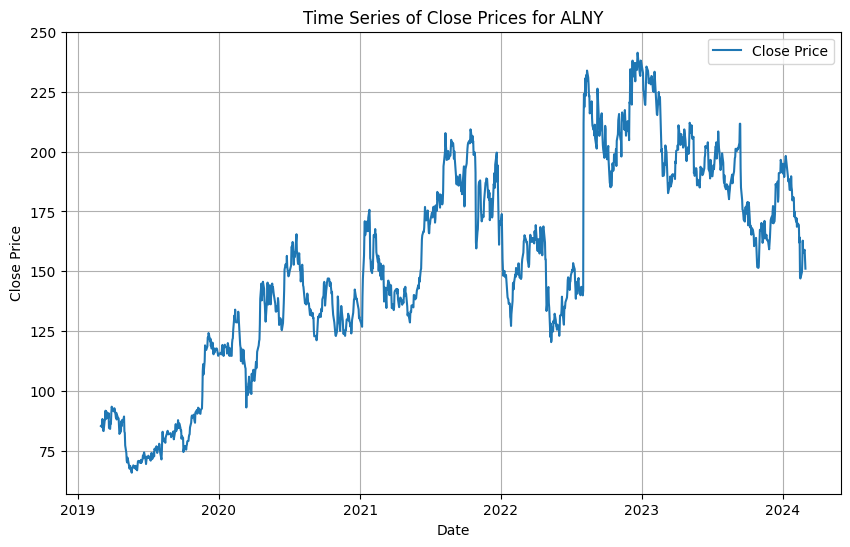

Time series plot for 'Close' column of ALNY displayed.


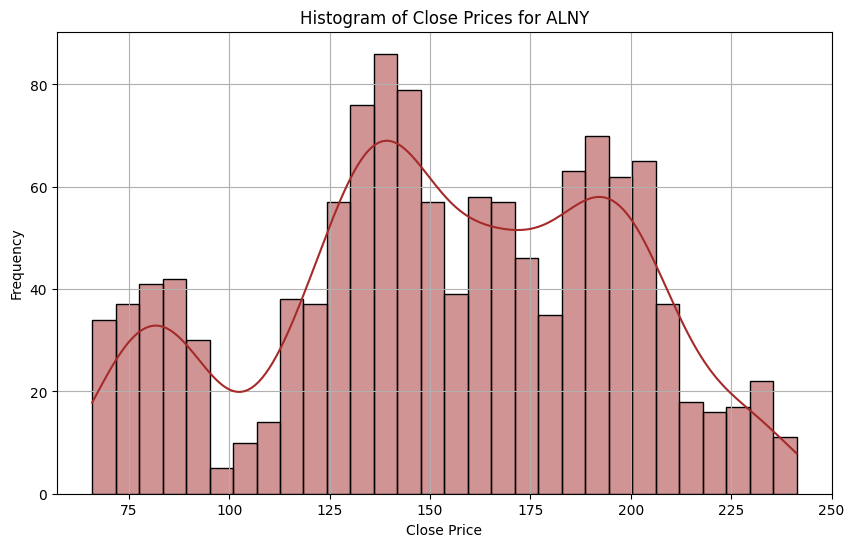

Histogram for 'Close' column of ALNY displayed.


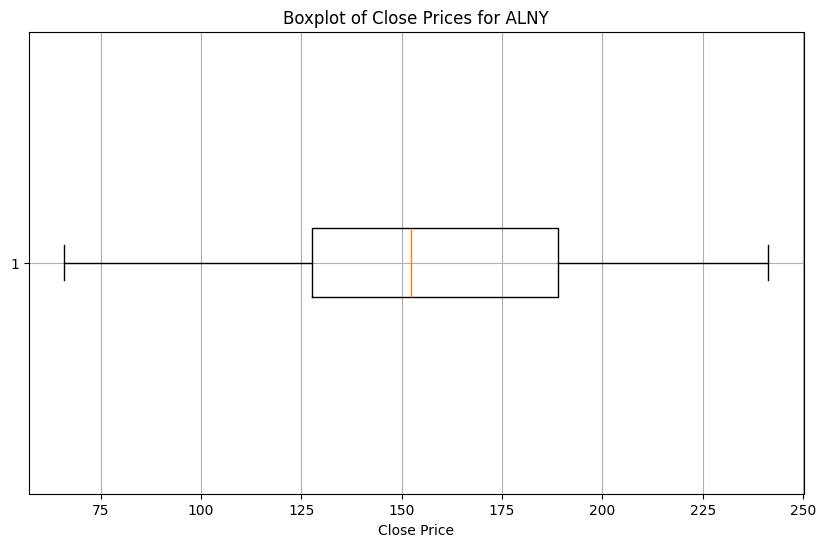

Boxplot for 'Close' column of ALNY displayed.




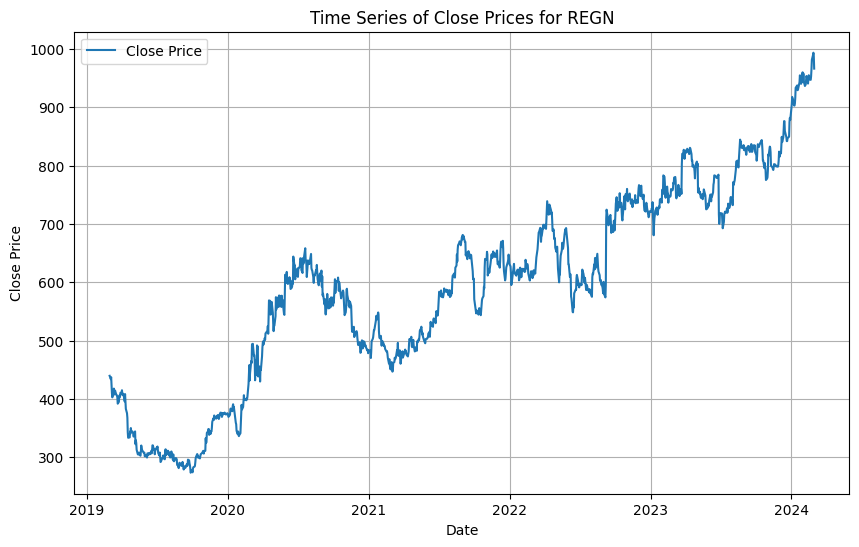

Time series plot for 'Close' column of REGN displayed.


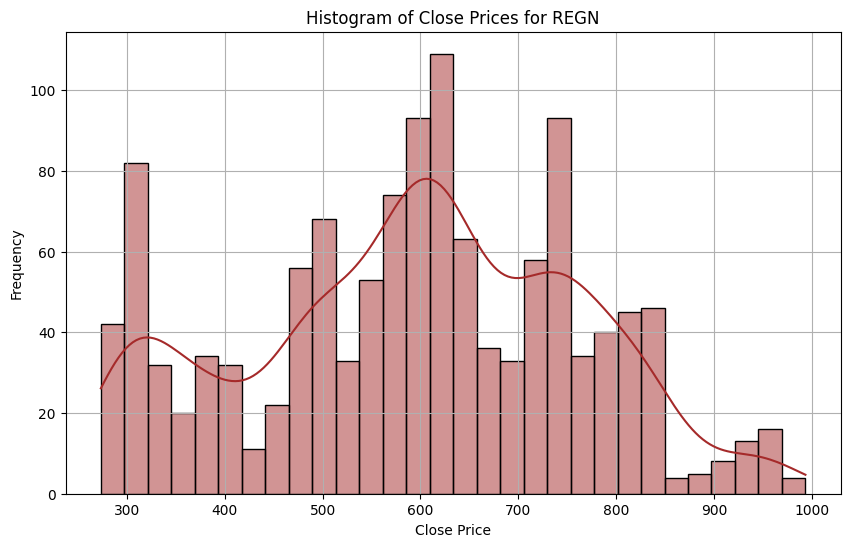

Histogram for 'Close' column of REGN displayed.


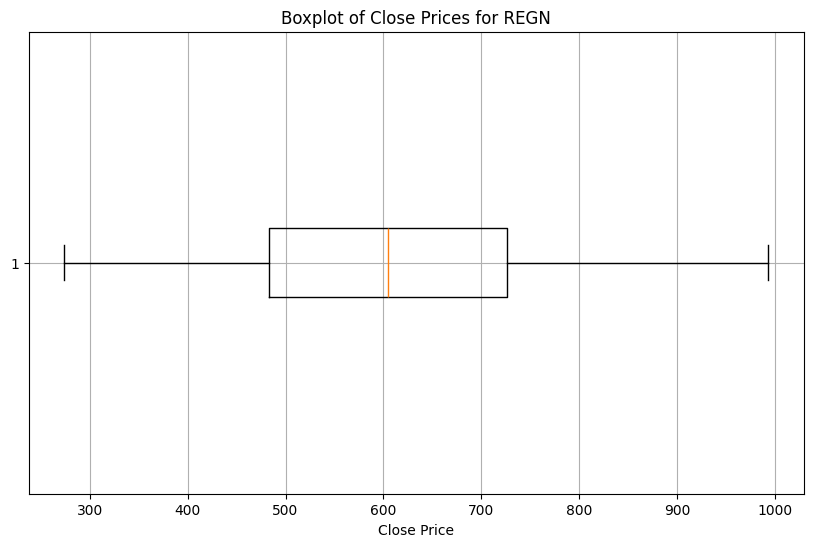

Boxplot for 'Close' column of REGN displayed.




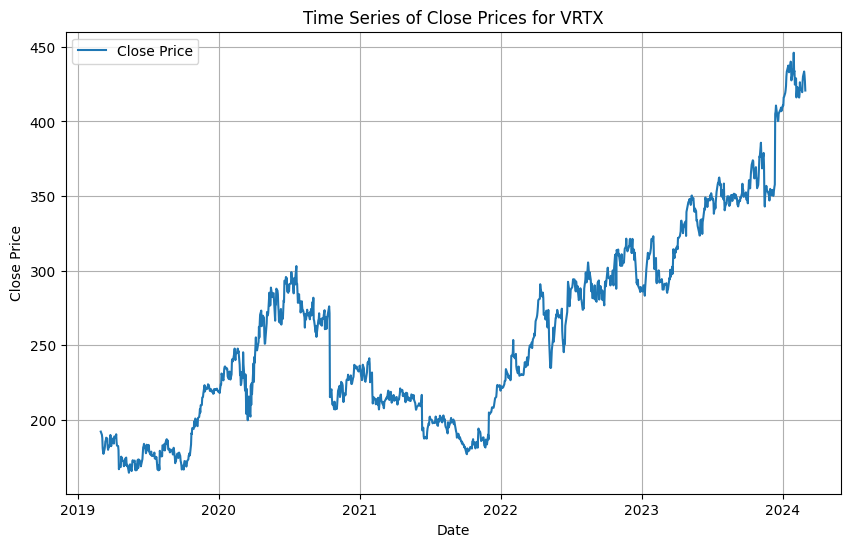

Time series plot for 'Close' column of VRTX displayed.


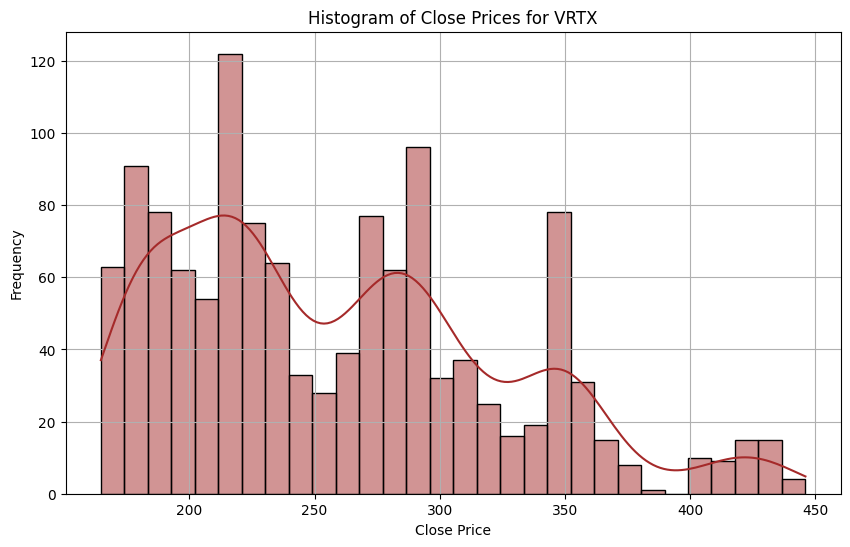

Histogram for 'Close' column of VRTX displayed.


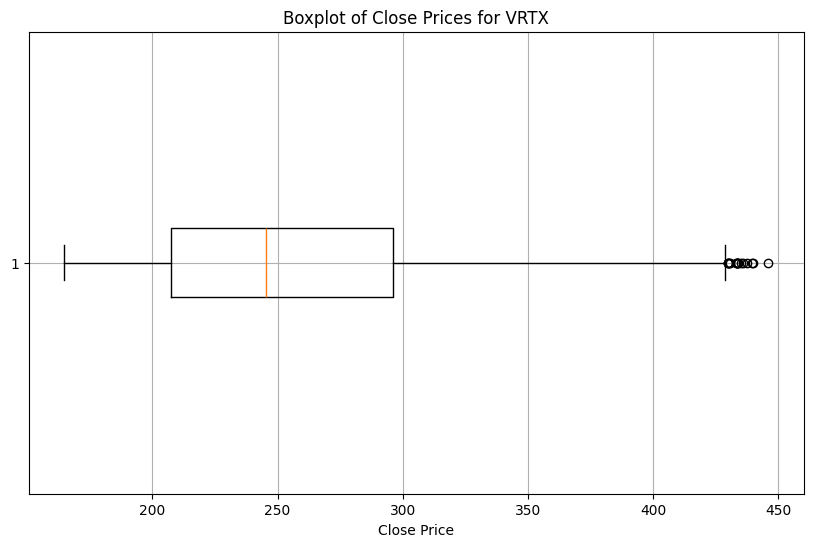

Boxplot for 'Close' column of VRTX displayed.




In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dfs is a dictionary of DataFrames
for name, df in dfs.items():
    # Check if 'Close' column exists and 'Date' column exists
    if 'Close' in df.columns and 'Date' in df.columns:
        # Set 'Date' column as the index if not already
        if not pd.api.types.is_datetime64_any_dtype(df['Date']):
            df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        
        # Plot the time series for the 'Close' column
        plt.figure(figsize=(10, 6))
        plt.plot(df['Close'], label='Close Price')
        plt.title(f"Time Series of Close Prices for {name}")
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid(True)
        plt.show()
        print(f"Time series plot for 'Close' column of {name} displayed.")
        
        # Plot the histogram with KDE for the 'Close' column
        plt.figure(figsize=(10, 6))
        sns.histplot(df['Close'], bins=30, kde=True, color='brown')
        plt.title(f"Histogram of Close Prices for {name}")
        plt.xlabel('Close Price')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        print(f"Histogram for 'Close' column of {name} displayed.")
        
        # Plot the boxplot for the 'Close' column
        plt.figure(figsize=(10, 6))
        plt.boxplot(df['Close'], vert=False)
        plt.title(f"Boxplot of Close Prices for {name}")
        plt.xlabel('Close Price')
        plt.grid(True)
        plt.show()
        print(f"Boxplot for 'Close' column of {name} displayed.")
        
    else:
        print(f"'Close' or 'Date' column not found in {name}")

    print("\n")


In [37]:
df1 = pd.read_csv('../Datasets/ALNY.csv')
df2 = pd.read_csv('../Datasets/REGN.csv')
df3 = pd.read_csv('../Datasets/VRTX.csv')

In [38]:

# Đặt các DataFrame vào một danh sách để xử lý dễ dàng hơn
dfs = [df1, df2, df3]
# Tạo hàm để chuyển đổi và xử lý từng DataFrame
def process_df(df):
    df['Date'] = pd.to_datetime(df['Date'])  # Chuyển đổi cột 'Date' thành datetime
    df.set_index('Date', inplace=True)       # Đặt 'Date' làm chỉ mục
    full_date_range = pd.date_range(start=df.index.min(), end=df.index.max())  # Tạo một khoảng ngày đầy đủ
    df = df.reindex(full_date_range)         # Reindex DataFrame để bao gồm tất cả các ngày
    df.interpolate(method='linear', inplace=True)  # Sử dụng phương pháp nội suy để điền giá trị bị thiếu
    # Làm tròn các cột cần thiết
    df[['Open', 'High', 'Low', 'Close', 'Adj Close']] = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].round(2)
    df['Volume'] = df['Volume'].astype('int64')  # Chuyển cột 'Volume' thành số nguyên
    
    return df

# Áp dụng hàm xử lý cho từng DataFrame trong danh sách
processed_dfs = [process_df(df) for df in dfs]

# Tách lại các DataFrame đã xử lý
df1, df2, df3 = processed_dfs

# 3. Thống kê tóm tắt

## 3.1 Lấy vài dòng dữ liệu đầu tiên

In [39]:
dfs = {
    'ALNY': df1,
    'REGN': df2,
    'VRTX': df3
}
for name, df in dfs.items():
    print(f"{name}:\n")
    print(df.head())
    print("\n")

ALNY:

             Open   High    Low  Close  Adj Close  Volume
2019-03-01  85.71  85.99  84.90  85.37      85.37  537900
2019-03-02  85.82  86.13  84.15  85.25      85.25  597866
2019-03-03  85.94  86.26  83.41  85.12      85.12  657833
2019-03-04  86.05  86.40  82.66  85.00      85.00  717800
2019-03-05  88.16  90.33  87.35  88.31      88.31  849900


REGN:

              Open    High     Low   Close  Adj Close  Volume
2019-03-01  434.80  440.05  431.93  439.57     439.57  511000
2019-03-02  436.93  440.70  430.74  437.66     437.66  597100
2019-03-03  439.05  441.35  429.55  435.74     435.74  683200
2019-03-04  441.18  442.00  428.36  433.83     433.83  769300
2019-03-05  432.12  439.65  430.49  437.13     437.13  478300


VRTX:

              Open    High     Low   Close  Adj Close   Volume
2019-03-01  189.95  192.69  189.28  192.16     192.16   887600
2019-03-02  190.98  193.09  188.42  191.45     191.45   994600
2019-03-03  192.00  193.49  187.57  190.75     190.75  1101600
201

## 3.2 Thống kê các cột số

In [40]:
# Assuming dfs is a dictionary of DataFrames
for name, df in dfs.items():
    # Exclude the 'date' column
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Additional Statistics
    additional_stats = pd.DataFrame()
    additional_stats['Count'] = numeric_df.count()
    additional_stats['Mean'] = numeric_df.mean()
    additional_stats['Standard Error'] = numeric_df.sem()
    additional_stats['Median'] = numeric_df.median()
    additional_stats['Mode'] = numeric_df.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    additional_stats['Standard Deviation'] = numeric_df.std()
    additional_stats['Sample Variance'] = numeric_df.var()
    additional_stats['Kurtosis'] = numeric_df.apply(kurtosis)
    additional_stats['Skewness'] = numeric_df.apply(skew)
    additional_stats['Minimum'] = numeric_df.min()
    additional_stats['25%'] = numeric_df.quantile(0.25)
    additional_stats['50%'] = numeric_df.median()
    additional_stats['75%'] = numeric_df.quantile(0.75)
    additional_stats['Maximum'] = numeric_df.max()

    additional_stats = additional_stats.transpose()
    
    # Sort the additional statistics by index (column names)
    additional_stats.sort_index(inplace=True)
     
    print(f"Thống kê cột của {name}:\n")
    print(additional_stats)
    print("\n")


Thống kê cột của ALNY:

                           Open         High          Low        Close  \
25%                  127.410000   130.530000   124.890000   127.750000   
50%                  152.000000   154.310000   148.840000   151.760000   
75%                  189.195000   191.960000   185.675000   189.380000   
Count               1827.000000  1827.000000  1827.000000  1827.000000   
Kurtosis              -0.753839    -0.732055    -0.772891    -0.744872   
Maximum              239.610000   242.970000   237.360000   241.310000   
Mean                 153.308544   156.184072   150.344477   153.313645   
Median               152.000000   154.310000   148.840000   151.760000   
Minimum               66.640000    67.720000    65.810000    65.860000   
Mode                 125.000000    84.480000   115.000000   147.000000   
Sample Variance     1837.757316  1893.271133  1787.921834  1839.915859   
Skewness              -0.200562    -0.202732    -0.189620    -0.197632   
Standard Devia

## 3.3 Lấy các kiểu dữ liệu và các cột không null

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2019-03-01 to 2024-02-29
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1827 non-null   float64
 1   High       1827 non-null   float64
 2   Low        1827 non-null   float64
 3   Close      1827 non-null   float64
 4   Adj Close  1827 non-null   float64
 5   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


# 4. Làm sạch dữ liệu

## 4.1 Đếm các giá trị còn thiếu trong tập dữ liệu

In [42]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 4.2 Xóa giá trị trùng lặp

In [43]:
df.duplicated().sum()

0

In [ ]:
# df1.to_csv('../Datasets/ALNY_processed.csv')
# df2.to_csv('../Datasets/REGN_processed.csv')
# df3.to_csv('../Datasets/VRTX_processed.csv')